In [1]:
import pandas as pd

In [2]:
barcodes = pd.read_csv('https://raw.githubusercontent.com/juliendelile/MouseSpinalCordAtlas/master/output/phenoData_annotated.csv', sep = '\t', index_col = 0)

In [3]:
genes = pd.read_csv('chistie_geni.csv', sep = ',',index_col=0)
genes

,AAACCTGCAAGCGAGT-1,AAACCTGGTCCCTACT-1,AAACCTGTCAGCACAT-1,AAACGGGAGATAGGAG-1,AAACGGGAGGCCATAG-1,AAACGGGAGTCGAGTG-1,AAACGGGCAATGGACG-1,AAACGGGTCACGGTTA-1,AAACGGGTCCACGTTC-1,AAACGGGTCCATGCTC-1,...,TTTGCGCCAAGCTGTT-11,TTTGCGCGTAGTGAAT-11,TTTGGTTTCTCGCATC-11,TTTGGTTTCTGCCCTA-11,TTTGTCAAGATGTGGC-11,TTTGTCAAGCTATGCT-11,TTTGTCAGTAGCTAAA-11,TTTGTCATCAGGTTCA-11,TTTGTCATCGGAATCT-11,TTTGTCATCGTGGTCG-11
ENSMUSG00000013033,0,1,0,0,0,0,2,0,0,2,...,1,0,1,0,0,1,0,0,0,0
ENSMUSG00000028184,1,0,0,1,0,0,1,0,0,1,...,1,2,0,0,0,0,0,0,0,2
ENSMUSG00000037605,0,0,0,0,0,0,0,0,0,0,...,1,2,0,0,1,0,1,0,0,1
ENSMUSG00000016150,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
ENSMUSG00000049336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
ENSMUSG00000031561,1,0,0,1,1,0,1,1,0,2,...,0,2,0,1,1,0,0,1,0,0
ENSMUSG00000048078,0,0,0,1,0,0,2,0,1,1,...,1,0,1,0,0,0,0,0,0,0
ENSMUSG00000047787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ENSMUSG00000047414,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
ENSMUSG00000051379,1,0,1,0,0,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
barcodes.head()

,timepoint,replicate_id,Type_step1,Type_step2,Type_step2_unique,DV,Neuron_subtypes,Pseudotime
AAACCTGAGCAGACTG-1,9.5,1,Mesoderm V,NaN,Mesoderm V,NaN,NaN,NaN
AAACCTGCAAGCGAGT-1,9.5,1,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGGTCCCTACT-1,9.5,1,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGTCAGCACAT-1,9.5,1,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGTCCCTTGCA-1,9.5,1,Mesoderm V,NaN,Mesoderm V,NaN,NaN,NaN


In [5]:
example = barcodes.loc[:, ['Neuron_subtypes', 'Type_step2_unique']]
example['Something'] = barcodes.apply(lambda x: 0 if pd.isna(x['Neuron_subtypes']) else 1, axis=1)
example

,Neuron_subtypes,Type_step2_unique,Something
AAACCTGAGCAGACTG-1,NaN,Mesoderm V,0
AAACCTGCAAGCGAGT-1,NaN,NaN,0
AAACCTGGTCCCTACT-1,NaN,NaN,0
AAACCTGTCAGCACAT-1,NaN,NaN,0
AAACCTGTCCCTTGCA-1,NaN,Mesoderm V,0
...,...,...,...
TTTGTCAAGCTATGCT-11,dl2.1,dl2,1
TTTGTCAGTAGCTAAA-11,dl4.6,dl4.1,1
TTTGTCATCAGGTTCA-11,NaN,NaN,0
TTTGTCATCGGAATCT-11,NaN,Null_Neuron,0


In [6]:
import numpy as np
subtypes_by_barcodes = barcodes.loc[:,['Neuron_subtypes', 'Type_step2_unique']]
subtypes_by_barcodes = subtypes_by_barcodes.apply(lambda x: x['Type_step2_unique'] if pd.isna(x['Neuron_subtypes']) else 
                                   x['Neuron_subtypes'], axis=1)
subtypes_by_barcodes[subtypes_by_barcodes.isna()] = 'Not_Defined'
subtypes_by_barcodes

AAACCTGAGCAGACTG-1      Mesoderm V
AAACCTGCAAGCGAGT-1     Not_Defined
AAACCTGGTCCCTACT-1     Not_Defined
AAACCTGTCAGCACAT-1     Not_Defined
AAACCTGTCCCTTGCA-1      Mesoderm V
                          ...     
TTTGTCAAGCTATGCT-11          dl2.1
TTTGTCAGTAGCTAAA-11          dl4.6
TTTGTCATCAGGTTCA-11    Not_Defined
TTTGTCATCGGAATCT-11    Null_Neuron
TTTGTCATCGTGGTCG-11          dl4.3
Length: 41025, dtype: object

In [7]:
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]
for curr_x, curr_y in zip(x, y):
    print(curr_x, curr_y)
    
# zip -- итерируем по х и у одновременно

1 1
2 2
3 3
4 4


In [8]:
from copy import deepcopy
genes_renamed_columns = deepcopy(genes)

new_cols = {key: value for key, value in zip(genes_renamed_columns.columns.values, subtypes_by_barcodes.values)}
# ключ баркод значние тип кл

genes_renamed_columns.rename(columns = new_cols, inplace=True)
print(genes_renamed_columns)

# сопоставляем баркод и тип кл

genes_cell_types_counts = genes_renamed_columns.groupby(lambda x: x, axis=1).sum()
# genes_renamed_columns.groupby(lambda x: x, axis=1).sum()

                    Mesoderm V  Not_Defined  Not_Defined  Not_Defined  \
ENSMUSG00000013033           0            1            0            0   
ENSMUSG00000028184           1            0            0            1   
ENSMUSG00000037605           0            0            0            0   
ENSMUSG00000016150           0            0            0            0   
ENSMUSG00000049336           0            0            0            0   
ENSMUSG00000031561           1            0            0            1   
ENSMUSG00000048078           0            0            0            1   
ENSMUSG00000047787           0            0            0            0   
ENSMUSG00000047414           0            0            0            0   
ENSMUSG00000051379           1            0            1            0   
ENSMUSG00000024109           0            0            0            0   

                    Mesoderm V  Mesoderm II  Mesoderm V  Not_Defined  \
ENSMUSG00000013033           0            0        

In [9]:
genes_cell_types_counts

,Blood,Erythrocytes,Erythrocytes II,Erythropoeitic,FP,Hematopoeitic,MN,MN.1,MN.2,MN.3,...,dp3,dp4,dp4.1,dp5,dp6,p0,p1,p2,p3,pMN
ENSMUSG00000013033,35,77,168,147,34,19,92,155,58,45,...,421,231,514,18,141,148,47,138,33,68
ENSMUSG00000028184,40,77,171,149,56,23,68,189,70,26,...,415,217,432,39,168,189,63,165,48,127
ENSMUSG00000037605,22,49,126,119,31,17,53,103,28,45,...,306,165,347,9,87,83,35,85,33,48
ENSMUSG00000016150,8,5,19,17,1,4,3,10,1,3,...,33,16,30,1,8,5,2,11,2,7
ENSMUSG00000049336,7,28,59,23,10,8,31,25,10,13,...,97,61,140,5,29,33,25,28,7,18
ENSMUSG00000031561,23,69,102,106,34,9,51,120,54,18,...,239,104,201,20,120,93,34,102,56,97
ENSMUSG00000048078,23,77,90,112,32,20,44,122,37,22,...,283,137,247,7,125,109,41,97,39,96
ENSMUSG00000047787,4,18,37,25,3,4,14,28,5,1,...,61,32,81,4,25,15,6,21,9,6
ENSMUSG00000047414,22,51,46,108,27,10,53,108,39,7,...,194,101,201,3,114,89,51,69,29,68
ENSMUSG00000051379,16,56,62,100,41,16,44,106,55,15,...,242,125,207,8,114,76,30,116,30,115


In [10]:
genes_cell_types_counts.to_csv('counts_by_genes.csv')

In [11]:
genes_cell_types_counts.drop(labels='Not_Defined',axis=1, inplace=True)

In [32]:
genes_cell_types_counts = genes_cell_types_counts.div(genes_cell_types_counts.sum(axis=1).values, axis=0) * 1e4
genes_cell_types_counts1 =  genes_cell_types_counts.apply(lambda x: x +1, axis=1)
genes_cell_types_counts1 = np.log2(genes_cell_types_counts1)
genes_cell_types_counts1

,Blood,Erythrocytes,Erythrocytes II,Erythropoeitic,FP,Hematopoeitic,MN,MN.1,MN.2,MN.3,...,dp3,dp4,dp4.1,dp5,dp6,p0,p1,p2,p3,pMN
ENSMUSG00000013033,4.601914,5.706643,6.817132,6.626313,4.561840,3.769740,5.958907,6.702011,5.306858,4.951221,...,8.134781,7.273070,8.421801,3.697602,6.566814,6.635996,5.011971,6.536117,4.520621,5.530971
ENSMUSG00000028184,4.803868,5.723692,6.859672,6.662821,5.274461,4.043181,5.547977,7.002878,5.588915,4.209926,...,8.131464,7.200735,8.189182,4.768665,6.834358,7.002878,5.440239,6.808593,5.058268,6.434801
ENSMUSG00000037605,4.510653,5.630629,6.975293,6.893506,4.986926,4.157180,5.741641,6.687072,4.844951,5.510359,...,8.248641,7.361623,8.429484,3.309786,6.446088,6.378981,5.156804,6.412924,5.074364,5.601489
ENSMUSG00000016150,6.196385,5.530069,7.432878,7.273395,3.327916,5.215926,4.813770,6.514373,3.327916,4.813770,...,8.225798,7.186515,8.088776,3.327916,6.196385,5.530069,4.254230,6.650442,4.254230,6.006548
ENSMUSG00000049336,4.287134,6.230620,7.295778,5.950997,4.779366,4.470512,6.375600,6.069424,4.779366,5.145703,...,8.009446,7.343571,8.537096,3.830967,6.280583,6.464745,6.069424,6.230620,4.287134,5.603824
ENSMUSG00000031561,4.735268,6.283661,6.841558,6.896579,5.281538,3.463519,5.854083,7.074135,5.935159,4.396599,...,8.062771,6.869331,7.813976,4.541736,7.074135,6.709509,5.281538,6.841558,5.986784,6.769694
ENSMUSG00000048078,4.672242,6.375228,6.597782,6.910355,5.132677,4.479070,5.580849,7.032754,5.336563,4.610681,...,8.240393,7.198842,8.044797,3.079896,7.067537,6.871515,5.481174,6.704767,5.410679,6.689960
ENSMUSG00000047787,4.296950,6.408631,7.439412,6.877799,3.906173,4.296950,6.050904,7.039983,4.604124,2.501867,...,8.157422,7.231257,8.565287,4.296950,6.877799,6.148989,4.857238,6.628595,5.425513,4.857238
ENSMUSG00000047414,4.933852,6.119754,5.973144,7.191225,5.220541,3.851904,6.174466,7.191225,5.739100,3.379529,...,8.031867,7.095233,8.082814,2.331051,7.268708,6.914177,6.119754,6.550431,5.320963,6.529596
ENSMUSG00000051379,4.356570,6.112725,6.257547,6.940024,5.670529,4.356570,5.770476,7.023423,6.087109,4.268148,...,8.208120,7.259600,7.983568,3.425329,7.127614,6.547801,5.230217,7.152527,5.230217,7.140124


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
genes_cell_types_counts1.columns

Index(['Blood', 'Erythrocytes', 'Erythrocytes II', 'Erythropoeitic', 'FP',
       'Hematopoeitic', 'MN', 'MN.1', 'MN.2', 'MN.3', 'MN.4', 'MN.6', 'MN.7',
       'Mesoderm I', 'Mesoderm II', 'Mesoderm III', 'Mesoderm IV',
       'Mesoderm V', 'Mesoderm VI', 'Myoblast', 'Neural Crest I',
       'Neural Crest II', 'Neural crest neurons I', 'Neural crest neurons II',
       'Neural crest neurons III', 'Null_Neuron', 'Null_Progenitor', 'RP',
       'Skin', 'V0.1', 'V0.2', 'V0.3', 'V1.1', 'V1.2', 'V1.3', 'V1.4', 'V1.5',
       'V1.6', 'V1.7', 'V2a', 'V2a.1', 'V2a.2', 'V2a.3', 'V2a.4', 'V2b.1',
       'V2b.2', 'V2b.3', 'V2b.4', 'V3.1', 'V3.2', 'V3.3', 'V3.4', 'dl1.1',
       'dl1.2', 'dl1.3', 'dl1.4', 'dl1.5', 'dl1.6', 'dl1.7', 'dl2.1', 'dl2.2',
       'dl2.3', 'dl2.4', 'dl2.5', 'dl3.1', 'dl3.2', 'dl3.3', 'dl3.4', 'dl3.5',
       'dl3.6', 'dl4.1', 'dl4.2', 'dl4.3', 'dl4.4', 'dl4.5', 'dl4.6', 'dl5.1',
       'dl5.2', 'dl5.3', 'dl5.4', 'dl5.5', 'dl6', 'dp1', 'dp2', 'dp3', 'dp4',
       'dp4.1', 

<AxesSubplot:>

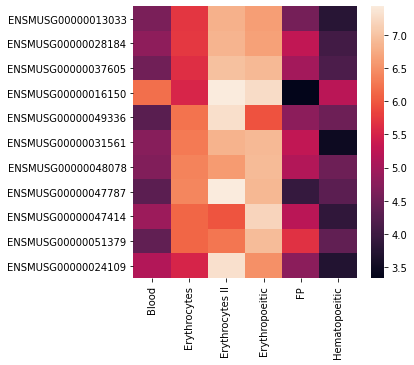

In [34]:
from matplotlib.pyplot import figure
figure(figsize=(5, 5))
sns.heatmap(genes_cell_types_counts1.iloc[:, :6])

<AxesSubplot:>

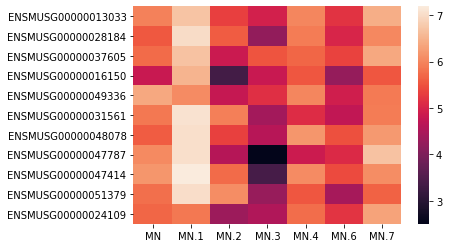

In [35]:
sns.heatmap(genes_cell_types_counts1.iloc[:, 6:13])

<AxesSubplot:>

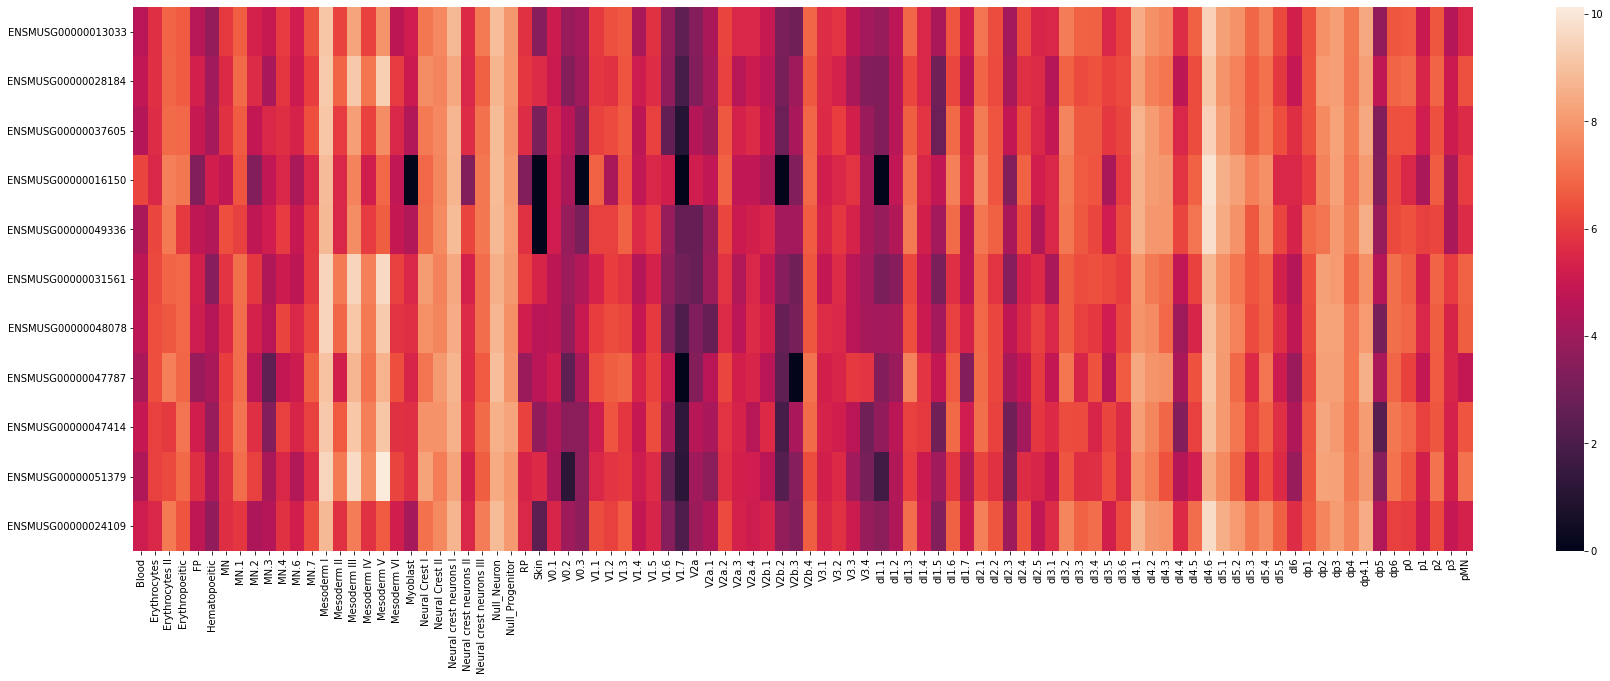

In [36]:
figure(figsize=(30, 10))
sns.heatmap(genes_cell_types_counts1.iloc[:,:])